In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the dataset from the file folder
t=pd.read_csv("D:/Fliprobo/Time Series/Time Series Company/Company Stock and Investment.csv")
stock=pd.DataFrame(t)
stock

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013
...,...,...,...,...,...
1979,09-11-2017,0.005984,0.000623,-0.002043,-0.003310
1980,10-11-2017,-0.007173,-0.000389,-0.006880,-0.003348
1981,13-11-2017,0.000352,-0.004944,-0.004008,0.003395
1982,14-11-2017,-0.019376,-0.002621,-0.015118,0.006793


In [3]:
#converting the date column from object to datetime
stock['Date']=pd.to_datetime(stock['Date'],format='%d-%m-%Y')

In [4]:
#checking the null data
stock.isnull().sum()

Date                       0
Oil Investments            0
Gold Investments           0
Comp Stock                 0
Other sharesInvestments    0
dtype: int64

Plotting each feature to get the data insights

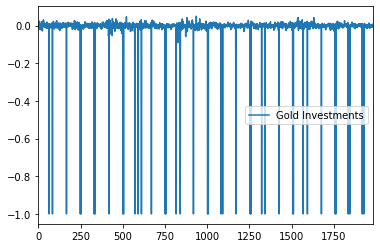

In [5]:
stock[['Gold Investments']].plot()

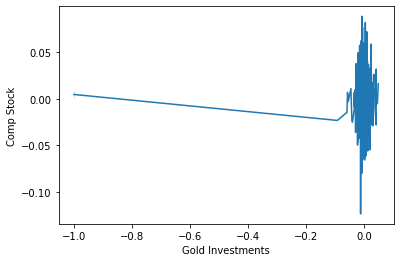

In [6]:
sns.lineplot('Gold Investments','Comp Stock',data=stock)

From the above graphs,we see gold and oil investments seems to be only fair and comp stock is much more associated to it.
As we are more interested to get predictions from stock,so dropping all other present features.

In [7]:
stock

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,2009-12-31,0.025417,0.000150,0.017354,0.006848
1,2010-01-04,0.026830,0.001097,0.015565,-0.004609
2,2010-01-05,0.002699,0.001560,0.001729,0.005900
3,2010-01-06,0.021688,0.006009,-0.015906,-0.018116
4,2010-01-07,-0.006256,0.000221,-0.001849,-0.017013
...,...,...,...,...,...
1979,2017-11-09,0.005984,0.000623,-0.002043,-0.003310
1980,2017-11-10,-0.007173,-0.000389,-0.006880,-0.003348
1981,2017-11-13,0.000352,-0.004944,-0.004008,0.003395
1982,2017-11-14,-0.019376,-0.002621,-0.015118,0.006793


In [8]:
stock.drop(['Oil Investments','Comp Stock','Other sharesInvestments'],axis=1,inplace=True)

In [9]:
#setting date as my index column
stock.set_index('Date',inplace=True)

In [10]:
stock.head()

,Gold Investments
Date,
2009-12-31,0.000150
2010-01-04,0.001097
2010-01-05,0.001560
2010-01-06,0.006009
2010-01-07,0.000221


In [11]:
stock['Gold Investments'].describe()

count    1984.000000
mean       -0.020152
std         0.140965
min        -1.000000
25%        -0.005881
50%         0.000000
75%         0.005454
max         0.049577
Name: Gold Investments, dtype: float64

In [12]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

def adfuller_test(sales):
    result=adfuller(sales) # same as above ,variable name changed
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ") 

In [13]:
adfuller_test(stock['Gold Investments'])

ADF Test Statistic : -15.906853851669043
p-value : 8.208405770369246e-29
#Lags Used : 7
Number of Observations Used : 1976
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


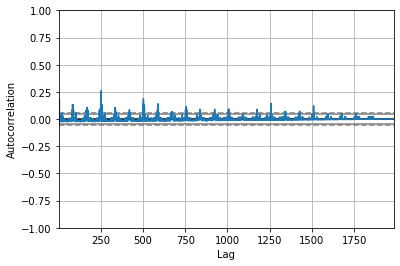

In [14]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(stock['Gold Investments'])
plt.show()

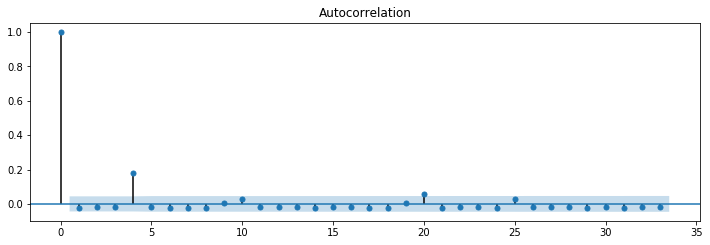

In [15]:
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
# First 12 values are null so we will start from 13
fig = sm.graphics.tsa.plot_acf(stock['Gold Investments'],ax=ax1)

In [16]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(stock['Gold Investments'],order=(1,1,1)) # this order is p d q(0 or 1) 
model_fit=model.fit()

C:\Users\Pradeep\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Pradeep\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [18]:
stock['forecast']=model_fit.predict(start=1900,end=1980,dynamic=True)

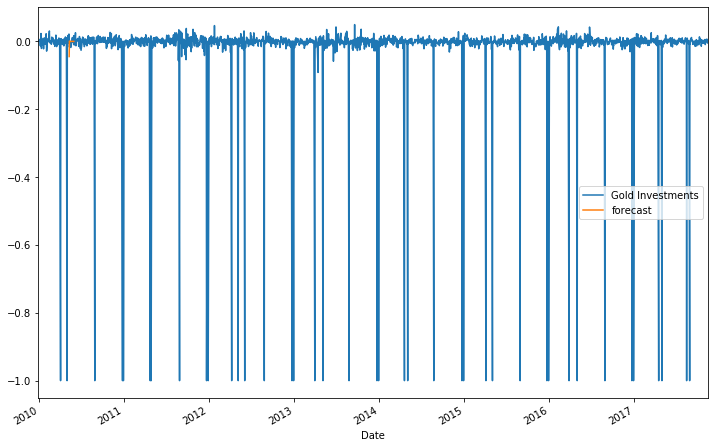

In [19]:
stock[['Gold Investments','forecast']].plot(figsize=(12,8))

In [20]:
mod=sm.tsa.statespace.SARIMAX(stock['Gold Investments'],order=(1, 1, 1),seasonal_order=(1,1,1,12)) #(p,d,q,Shift)
results=mod.fit()

C:\Users\Pradeep\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


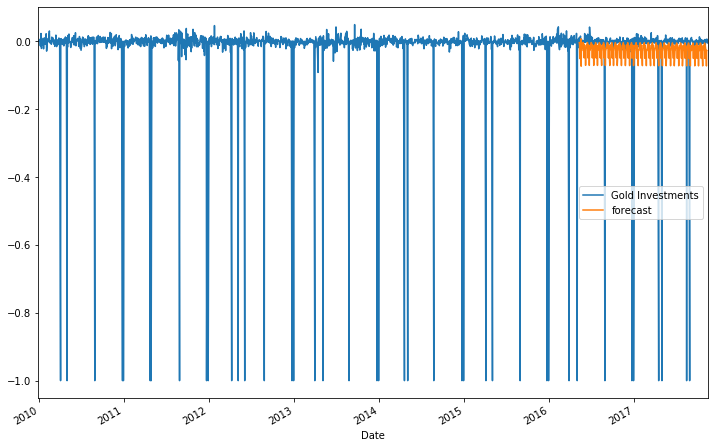

In [21]:
stock['forecast']=results.predict(start=1600,end=1980,dynamic=True)
stock[['Gold Investments','forecast']].plot(figsize=(12,8))

In [22]:
#creating some data to predict future of this.
from pandas.tseries.offsets import DateOffset
future_dates=[stock.index[-1]+ DateOffset(months=x)for x in range(0,48)]

In [23]:
stock

,Gold Investments,forecast
Date,,
2009-12-31,0.000150,NaN
2010-01-04,0.001097,NaN
2010-01-05,0.001560,NaN
2010-01-06,0.006009,NaN
2010-01-07,0.000221,NaN
...,...,...
2017-11-09,0.000623,-0.028432
2017-11-10,-0.000389,-0.027134
2017-11-13,-0.004944,NaN


In [24]:
future_stock=pd.DataFrame(index=future_dates[1:],columns=stock.columns)
future_stock.tail()

,Gold Investments,forecast
2021-06-15,NaN,NaN
2021-07-15,NaN,NaN
2021-08-15,NaN,NaN
2021-09-15,NaN,NaN
2021-10-15,NaN,NaN


In [25]:
future_st=pd.concat([stock,future_stock])
future_st

,Gold Investments,forecast
2009-12-31,0.000150,NaN
2010-01-04,0.001097,NaN
2010-01-05,0.001560,NaN
2010-01-06,0.006009,NaN
2010-01-07,0.000221,NaN
...,...,...
2021-06-15,NaN,NaN
2021-07-15,NaN,NaN
2021-08-15,NaN,NaN
2021-09-15,NaN,NaN


C:\Users\Pradeep\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


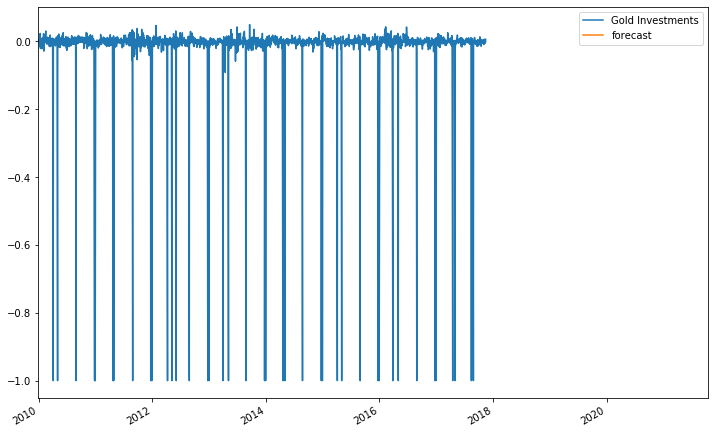

In [27]:
future_st['forecast']=results.predict(start = 1983, end = 3000, dynamic= True)
future_st[['Gold Investments','forecast']].plot(figsize=(12, 8))